In [121]:
%%capture
%run shared.ipynb

In [122]:
# numerical values
print(df.Sist_besok.unique())
print(df.Hyppighet.unique())

['3-11 måneder siden' 'Mindre enn 3 måneder siden' '1-3 år siden'
 '6 år siden eller mer' '3-6 år siden' '3-11 months ago'
 'Less than 3 months ago' 'Aldri' '1-3 years ago' '3-6 years ago' nan]
['1-2 ganger' '20-39 ganger' '6-9 ganger' '40 ganger eller mer'
 '3-5 ganger' nan '10-19 ganger' '10-19 times' '1-2 times' '20-39 times'
 '3-5 times' '40 times or more']


In [123]:
#Removes duplicate responses due to language of survey, converts all responses to Norwegian values
english_h = df.Hyppighet.str.contains('times') & df.Hyppighet.notna()
df.loc[english_h, 'Hyppighet'] = df[english_h].Hyppighet.str.replace('times', 'ganger').str.replace('or more', 'eller mer')

In [124]:
#Removes duplicate responses due to language of survey, converts all responses to Norwegian values
english_sb = df.Sist_besok.str.contains('ago') & df.Sist_besok.notna()
df.loc[english_sb, 'Sist_besok'] = df[english_sb].Sist_besok.str.replace('Jeg har aldri fysisk besøkt et folkebibliotek', 'Aldri')\
.str.replace('Less than', 'Mindre enn')\
.str.replace('years ago', 'år siden')\
.str.replace('months ago', 'måneder siden')
print(df.Sist_besok.unique())
#print(sum(alle_skeive.Sist_besok == "Mindre enn 3 måneder siden"), sum(alle_skeive.Sist_besok == "3-11 måneder siden"))

['3-11 måneder siden' 'Mindre enn 3 måneder siden' '1-3 år siden'
 '6 år siden eller mer' '3-6 år siden' 'Aldri' nan]


In [125]:
def print_besøk(df1, df2):
    answer = df.Sist_besok.items()
    answers = df.Sist_besok.unique()
    for answer in answers:
        print(answer, "Q", "{:.1%}".format(sum(df1.Sist_besok == answer)/len(df1)), "  Bi+:", "{:.1%}".format(sum(df2.Sist_besok == answer)/len(df2)))

print_besøk(alle_skeive, bi_plus)

3-11 måneder siden Q 22.6%   Bi+: 22.7%
Mindre enn 3 måneder siden Q 54.7%   Bi+: 58.9%
1-3 år siden Q 9.2%   Bi+: 8.9%
6 år siden eller mer Q 5.0%   Bi+: 2.6%
3-6 år siden Q 3.3%   Bi+: 2.3%
Aldri Q 0.5%   Bi+: 0.3%
nan Q 0.0%   Bi+: 0.0%


In [126]:
22.6 + 54.7

77.30000000000001

In [127]:
15.9 + 8.7 + 11.2

35.8

In [128]:
def print_hyppighet(df1, df2):
    answer = df.Hyppighet.items()
    answers = df.Hyppighet.unique()
    for answer in answers:
        print(answer, "Q", "{:.1%}".format(sum(df1.Hyppighet == answer)/len(df1)), "  Bi+:", "{:.1%}".format(sum(df2.Hyppighet == answer)/len(df2)))

print_hyppighet(alle_skeive, bi_plus)

1-2 ganger Q 19.2%   Bi+: 17.4%
20-39 ganger Q 8.7%   Bi+: 8.6%
6-9 ganger Q 16.2%   Bi+: 18.8%
40 ganger eller mer Q 11.2%   Bi+: 12.8%
3-5 ganger Q 18.5%   Bi+: 19.1%
nan Q 0.0%   Bi+: 0.0%
10-19 ganger Q 15.9%   Bi+: 16.1%


In [129]:
mannwhitneyu_norm(cis_heterofile.Hyppighet_n, alle_skeive.Hyppighet_n)

'Common language effect size: 54.1%, p-value: 0.05859725628634832'

In [130]:
mannwhitneyu_norm(cis_heterofile.Sist_besok_måneder, alle_skeive.Sist_besok_måneder)

'Common language effect size: 50.0%, p-value: 0.9823910596335517'

In [131]:
ch_over_ett_år = len(cis_heterofile[cis_heterofile.Sist_besok.isin(["1-3 år siden", "6 år siden eller mer"])])
s_over_ett_år = len(alle_skeive[alle_skeive.Sist_besok.isin(["1-3 år siden", "6 år siden eller mer"])])
print(ch_over_ett_år/len(cis_heterofile))
print(s_over_ett_år/len(alle_skeive))

0.1760299625468165
0.14174454828660435


Analysis: Cishetero respondents visited the library slightly more regularly than queer respondents, but the difference was not statisitcally significant. (p = .21) However, this may actually represent a significant finding given that the link to the survey for cishetero respondents was advertised in a number of groups related to reading and libraries (thus likely leading to an oversampling of avid library users), which was not the case for queer respondents. Only 14,6% og queer respondents had not visited a public library in the past year, as compared to 17,6% of cishetero respondents and 60% of the general population in SSBs 2015 study. This discrepancy is unexpected and may be significant given the channels in which the links to participate were shared. Unfortunately, it is not possible to conclusively state whether the queer population uses the library significantly more regularly and more frequently than the non-queer population, or whether these results are entirely due to self-selection bias and library users being more interested in taking a survey related to libraries. 

In [132]:
# alt.Chart(overall_df).mark_bar().encode(
#     x="group",
#     color=alt.Color(
#         "Hyppighet",
#         sort=sorted(
#             Hyppighet_map,
#             key=Hyppighet_map.get,
#         reverse=True),
#         scale=alt.Scale(scheme="spectral"),
#     ),
#     order=alt.Order("Hyppighet_n"),
#     y=alt.Y("count()", stack="normalize"),
# )

# #Redo altair charts in matplotlib

In [133]:
# alt.Chart(overall_df).mark_bar().encode(
#     x="group",
#     color=alt.Color(
#         "Sist_besok_måneder",
#         sort=sorted(
#             sist_besok_map,
#             key=sist_besok_map.get,
#         reverse=True),
#         scale=alt.Scale(scheme="spectral"),
#     ),
#     order=alt.Order("Sist_besok_måneder"),
#     y=alt.Y("count()", stack="normalize"),
# )

# #Redo altair charts in matplotlib

Analysis: quite a few questions have significant differences between age groups. We tend to have a narrative of progress - things getting better for queer people, but on most measures, young people are the least satisfied and have the most negative experiences. This may suggest that young people have higher expectations and thus are more disappointed by the library failing to meet their needs. It may also suggest that things are in fact getting worse for the younger generation. It is most likely a combination of the two. These results indicate the need for more qualitative data gathering; interviews could help fill in the gaps here. 

In [134]:
sum(alle_skeive.Avrunding_B.isna())/len(alle_skeive)

0.8099688473520249

In [135]:
642-121


521

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Lhbtiq_vennlig'}>)

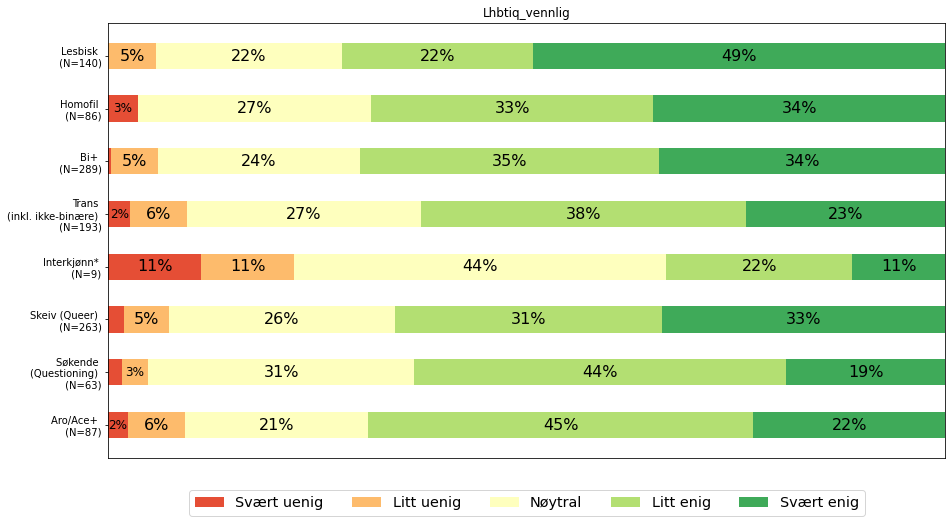

In [216]:
# Making a horizontal bar graph that works for all questions and multiple questions OR multiple groups

#category of scale
five_pt = pd.CategoricalDtype([-2, -1, 0, 1, 2], ordered=True)
seven_pt = pd.CategoricalDtype([1, 2, 3, 4, 5, 6, 7], ordered=True)

#scale (labels for legend)
enighetsskala = ["Svært uenig", "Litt uenig", "Nøytral", "Litt enig", "Svært enig",]
hyppighetsskala = ["Aldri", "Sjeldent", "Noen ganger", "Ofte", "Hver gang",]
hendelsesskala = ["Aldri", "Kun under Pride", "Et par ganger", "Noen ganger", "Mange ganger",]
viktighetsskala = ["Ikke viktig i det hele tatt", "Ikke så viktig", "Nøytral / ingen mening", "Litt viktig", "Svært viktig",]
holdningsskala = ["Svært negativ", "Litt negativ", "Nøytral", "Litt positiv", "Svært positiv",]
tilfredshetsskala = ["Ikke i det \nhele tatt", "2", "3", "Nøytral", "5", "6", "I svært \nstor grad"]

scales = {
    'UV' : (hendelsesskala, five_pt),
    'UBU' : (hendelsesskala, five_pt),
    'Andre_temaer' : (hendelsesskala, five_pt),
    'Arr' : (hendelsesskala, five_pt),
    
    'utlan' : (hyppighetsskala, five_pt),
    'bla_i' : (hyppighetsskala, five_pt),
    'datamaskin' : (hyppighetsskala, five_pt),
    'still_spm' : (hyppighetsskala, five_pt),
    'utrygt' : (hyppighetsskala, five_pt),
    'm_med_respekt' : (hyppighetsskala, five_pt),
    
    'Holdning_UV' : (holdningsskala, five_pt),
    'Holdning_UBU' : (holdningsskala, five_pt),
    'Holdning_Andre_temaer' : (holdningsskala, five_pt),
    'Holdning_Arr' : (holdningsskala, five_pt),
    
    'Mer_skj_item' : (holdningsskala, five_pt),
    'Mer_skj_skaper' : (holdningsskala, five_pt),
    'Mer_skj_mangfold' : (holdningsskala, five_pt),
    'Mer_faglitt' : (holdningsskala, five_pt),
    'Mer_BU' : (holdningsskala, five_pt),
    'Bedre_gjenfinning' : (holdningsskala, five_pt),
    'Info' : (holdningsskala, five_pt),
    'Kompetanseheving' : (holdningsskala, five_pt),
    'Apne_ansatte' : (holdningsskala, five_pt),
    'Tredje_KI' : (holdningsskala, five_pt),
    'Selvbestemt_KID' : (holdningsskala, five_pt),
    'Endre_KID' : (holdningsskala, five_pt),
    'Toaletter' : (holdningsskala, five_pt),
    'Pronomen_bruk' : (holdningsskala, five_pt),
    'Nulltoleranse' : (holdningsskala, five_pt),
    'Skilting' : (holdningsskala, five_pt),
    
    "Overall_tilfredshet" : (tilfredshetsskala, seven_pt, True),
    "Overall_behov_KH" : (tilfredshetsskala, seven_pt),
    "Individ_behov_KH" : (tilfredshetsskala, seven_pt),
    "Interesse_KH" : (tilfredshetsskala, seven_pt),
    "Behov_kompetanseheving" : (tilfredshetsskala, seven_pt, False),
    
    'Utvalg_KID' : (enighetsskala, five_pt, True),
    'Utvalg_Orientering' : (enighetsskala, five_pt, True),
    'Utvalg_Intersex' : (enighetsskala, five_pt, True),
    'Utvalg_lykkelig' : (enighetsskala, five_pt, True),
    'Utvalg_fag' : (enighetsskala, five_pt, True),
    'Aldri_tenkt' : (enighetsskala, five_pt, True),
    'Utrygt_stille_spm' : (enighetsskala, five_pt, True),
    'Rep_matters_B' : (enighetsskala, five_pt, True),
    'Bib_pleier_ha' : (enighetsskala, five_pt, True),
    'Alltid_velkommen' : (enighetsskala, five_pt, True),
    'Trygge_rom_gen_B' : (enighetsskala, five_pt, True),
    'Ingen_rolle' : (enighetsskala, five_pt, True),
    'Ingenting_tilby' : (enighetsskala, five_pt, True),
    'Bibs_ansvar' : (enighetsskala, five_pt, True),
    'Minoritetsstress_ansatte' : (enighetsskala, five_pt, True),
    'Minoritetsstress_brukere' : (enighetsskala, five_pt, True),
    'Lhbtiq_vennlig' : (enighetsskala, five_pt, True),
    'Rom_for_forbedring' : (enighetsskala, five_pt, True),
    'Andre_brukere' : (enighetsskala, five_pt, True),
    'Helt_meg_selv' : (enighetsskala, five_pt, True),
    'Ikke_velkommen' : (enighetsskala, five_pt, True),
    'Ingen_rolle_IB' : (enighetsskala, five_pt, True),
    'Trygge_rom_pers_IB' : (enighetsskala, five_pt, True),
    'Trygge_rom_gen_IB' : (enighetsskala, five_pt, True),
    'Godt_utvalg' : (enighetsskala, five_pt, True),
    'Skeiv_medieforbruk_pos' : (enighetsskala, five_pt, True),
    'Skeiv_medieforbruk_neg' : (enighetsskala, five_pt, True),
    'Rep_matters_IB' : (enighetsskala, five_pt, True),

}

#enighet_category = pd.CategoricalDtype([-2, -1, 0, 1, 2], ordered=True)
#tilfredshet_category = pd.CategoricalDtype([1, 2, 3, 4, 5, 6, 7], ordered=True)


# categorical data type for enighet columns
# ensures value_counts() returns 0 for categories with no responses


def hbar_scales(df, columns, title=None, group_order=None):
    """

    Plot enighet bars for all groups

    Parameters
    ----------
    df : DataFrame (e.g. created with regroup()) or group dict of dataframes
    columns : list of str
        The column(s) to plot for each group
    """
    if isinstance(columns, str):
    # allow columns to be a single column name
        columns = [columns]
    column = columns[0]   
    
    scale, category, low_is_bad = scales.get(column)
    
    if title is None:
        title = ", ".join(columns)
    # create a dict of {'group name': subset_df for just that group}
    if isinstance(df, dict):
        groups = df
    elif "group" in df.columns:
        groups = {}
        for cat in df.group.dtype.categories:
            groups[cat] = df[df.group == cat]
    else:
        # no groups given, use just one group
        groups = {"": df}

    #Different sorting options    
    if group_order == 'ce_descending':
        def count_enig(key):
            series = groups[key][columns[0]]
            return 1.0 * (((series == 2).sum()) + (series == 1).sum()) / len(series.dropna())

        group_order = sorted(groups.keys(), key=count_enig, reverse=True)
        #title = f"{title}\n (Sortert etter sterk enighet i synkende rekkefølge)"
    
    elif group_order == 'se_descending':
        def count_svært_enig(key):
            series = groups[key][columns[0]]
            return 1.0 * (series == 2).sum() / len(series.dropna())

        group_order = sorted(groups.keys(), key=count_svært_enig, reverse=True)
        #title = f"{title}\n (Sortert etter enighet (litt + svært enig) i synkende rekkefølge)"
    
    elif group_order == 'cu_descending':
        def count_enig(key):
            series = groups[key][columns[0]]
            return 1.0 * (((series == -2).sum()) + (series == -1).sum()) / len(series.dropna())

        group_order = sorted(groups.keys(), key=count_enig, reverse=True)
        #title = f"{title}\n (Sortert etter sterk enighet i synkende rekkefølge)"
    
    elif group_order == 'su_descending':
        def count_svært_enig(key):
            series = groups[key][columns[0]]
            return 1.0 * (series == -2).sum() / len(series.dropna())

        group_order = sorted(groups.keys(), key=count_svært_enig, reverse=True)
        #title = f"{title}\n (Sortert etter enighet (litt + svært enig) i synkende rekkefølge)"
    
    if group_order:
        iterable = [(key, groups[key]) for key in group_order]
    else:
        iterable = groups.items()
    
    
    
    # construc the results dict
    # with 5 numbers for each combination of group + column
    results = {}
    nice_column_names = {
        "Jeg bruker ikke folkebibliotek fordi at jeg ikke \nføler meg velkommen der som en skeiv/LHBTIQ+ person" : 'Ikke_velkommen',
        "Jeg ville brukt biblioteket om jeg var sikker på \nat det ville være et trygt rom for meg som skeiv/LHBTIQ+ person" : 'Trygge_rom_pers_IB',
    }
    # reorder these `for...` lines to switch whether questions or groups
    
    for column in columns:
        for group, group_df in iterable:
            nice_column = nice_column_names.get(column, column)
            label = group
            if len(group_df) <= 20:
                label += "*"
            label = f"{label} \n (N={len(group_df[column].dropna())})"
            if len(columns) > 1:
                label = f"{nice_column} {label}"
            # group_df[column] means get that column for that group
            # the rest is turn it into 5 numbers for the fractional value counts
            results[label] = (
                group_df[column]
                .astype(category)
                .value_counts(normalize=True)
                .sort_index()
                .array
            )
        
    # from this point on, the rest of the function is unchanged
    labels = list(results.keys())
    # Line below = "value counts array"
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    if len(scale) == 5:
        category_colors = plt.get_cmap("RdYlGn")(np.linspace(0.15, 0.85, data.shape[1]))
    elif len(scale) == 7:
        if low_is_bad == True:
            category_colors=mycolors
        else:
            category_colors=mycolors[::-1]

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.title.set_text(title)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(scale, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2

  #      r, g, b, _ = color
        text_color = "black"  # if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c > .04:
                size=16
            elif c < .02:
                continue
            else:
                size=12
            ax.text(
                    x,
                    y,
                    str(int(c * 100)) + "%",
                    ha="center",
                    va="center",
                    color=text_color, 
                    size=size
            )
    ax.legend(
        ncol=len(scale),
        fancybox=True,
        bbox_to_anchor=(0.5, -0.15),
        loc="lower center",
        fontsize="x-large",
    )

    return fig, ax


cishet_skeive = {
    "cis-heterofile": cis_heterofile,
    "skeive": alle_skeive,
}
cishet_skeive_df = regroup(cishet_skeive)

hbar_scales(LGBTQIA_groups, ["Lhbtiq_vennlig"], group_order=None)



Object `get` not found.
